## Concrete Compressive Strength Data Set

Dataset found on UCI: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

#### Description:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

#### Data Set Information:

- Number of instances 1030

- Number of Attributes 9

  - 8 inputs variables:

    - Cement (component 1) -- quantitative -- kg in a m3 mixture --> Cement
    - Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture --> BFS
    - Fly Ash (component 3) -- quantitative -- kg in a m3 mixture --> FA
    - Water (component 4) -- quantitative -- kg in a m3 mixture --> Water
    - Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture --> SP
    - Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture --> CAgg
    - Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture --> FAgg
    - Age -- quantitative -- Day (1~365) --> Age

  - 1 Output:

    - Concrete compressive strength -- quantitative -- MPa --> Strength

      

------

Import the datas

In [2]:
import pandas as pd
# change colomn names for more readability
colnames = ['Cement','BFS','FA','Water','SP','Cagg','Fagg','Age','Strength']
data = pd.read_excel('Concrete_Data.xls',names=colnames)

------

Frist Exploration of datas

In [3]:
data.head()

,Cement,BFS,FA,Water,SP,Cagg,Fagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement      1030 non-null float64
BFS         1030 non-null float64
FA          1030 non-null float64
Water       1030 non-null float64
SP          1030 non-null float64
Cagg        1030 non-null float64
Fagg        1030 non-null float64
Age         1030 non-null int64
Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


--> no null value in the dataset.

get some statistics to have a better view of dataset

In [5]:
data.describe()

,Cement,BFS,FA,Water,SP,Cagg,Fagg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Distribution of the different variables

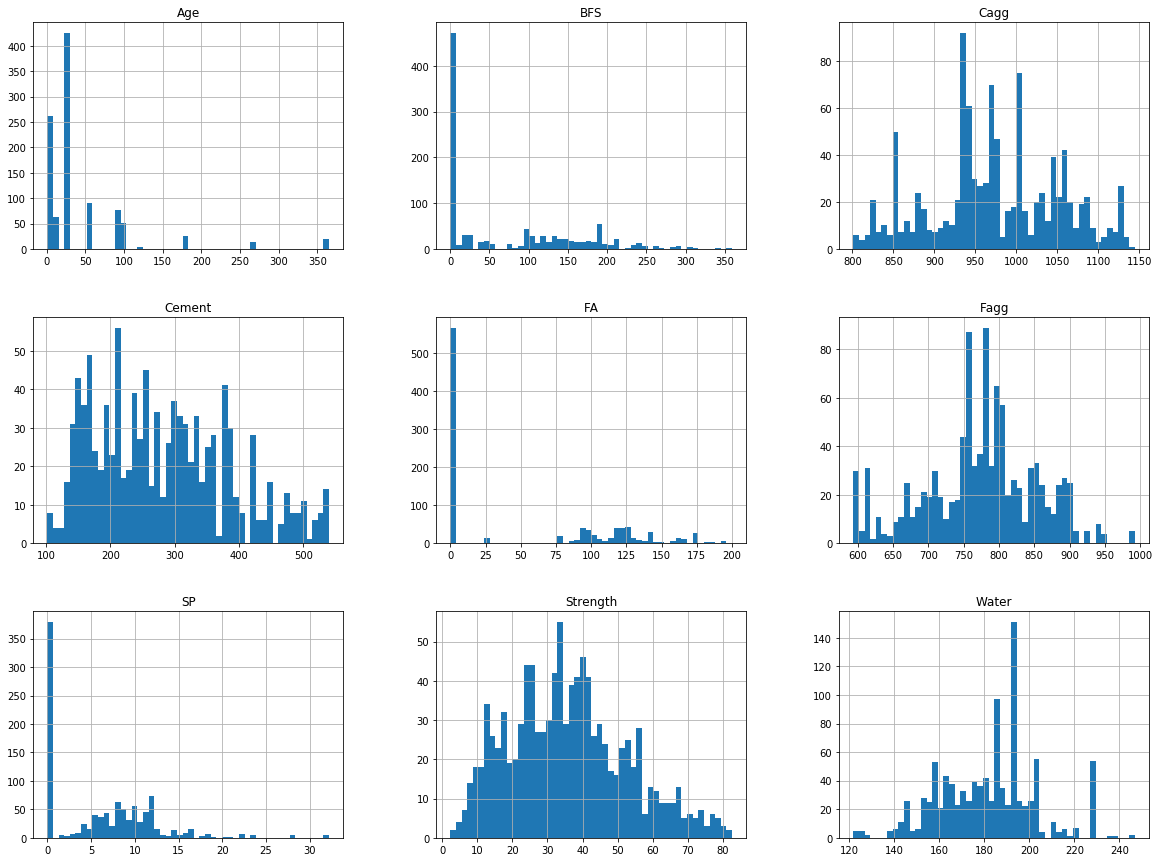

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

------

Split data to have train/test dataset

In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size=0.2, random_state=37)

train = train.sort_index()
xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,-1:]

test = test.sort_index()
xtest = test.iloc[:,:-1]
ytest = test.iloc[:,-1:]

Try simple linear regression as baseline

In [8]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(xtrain, ytrain)

score = linreg.score(xtest, ytest)*100
print("Simple Linear Model Score : %.2f %%" % score)

Simple Linear Model Score : 58.51 %


Try now with KNN with different number of neigbours (check if it's improve)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

scoremax=0
imax=0
for i in range(1,10):
    
    knnreg = KNeighborsRegressor(n_neighbors=i)
    knnreg.fit(xtrain, ytrain)
    score = knnreg.score(xtest, ytest)*100
    print("KNN Score for %d neighbours: %.2f %%" % (i,score))
    if score > scoremax:
        scoremax = score
        imax=i

print("Best Score for KNN with %d neigbours: %.2f %%" % (imax,scoremax))

KNN Score for 1 neighbours: 67.47 %
KNN Score for 2 neighbours: 64.80 %
KNN Score for 3 neighbours: 70.11 %
KNN Score for 4 neighbours: 69.25 %
KNN Score for 5 neighbours: 66.91 %
KNN Score for 6 neighbours: 65.03 %
KNN Score for 7 neighbours: 62.45 %
KNN Score for 8 neighbours: 62.68 %
KNN Score for 9 neighbours: 62.33 %
Best Score for KNN with 3 neigbours: 70.11 %


Try now with MLP regressor

In [61]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

mlpreg = MLPRegressor(random_state=37)

scaler = preprocessing.StandardScaler().fit(xtrain)
scaler.transform(xtrain)
mlpreg.fit(xtrain, ytrain.Strength.ravel())

scaler.transform(xtest)
score = mlpreg.score(xtest, ytest)*100
print("Simple Linear Model Score : %.2f %%" % score)

Simple Linear Model Score : 77.85 %
